# Ecuación de difusión

**Autor:** Felix Alberto Nieto García

**Lenguaje:** Python

**Ecuación diferencial**

Sea un retángulo  $ R_e = [0,1] \times [0,1]$ donde se resuelve la ecuación de calor $T(t,x,y)$ de forma adimensinal  dada por 

$\frac{\partial T}{\partial t}= \nabla ^2 T.$

Sea un disco $D_R$ de radio $R=1/2$ centrado en el cuadrado $R_e$, para estas dos regiones tenemos las condiciones iniciales y de contorno

$T(0,x,y) = \left \{ \begin{matrix} 
1 &  (x,y) \in R_e -D_R\\
T_1 & (x,y) \in D_R
\end{matrix} \right.$


**Discretización de la malla**

Para una malla cuadrada $ (x,y) \in [0,1] \times [0,1]$ se discretiza en pasos uniformes $h$ y para el tiempo $t \in [0, 1] $ se discretiza en pasos uniformes $m$ entonces la posición y el tiempo se expresan como $t_n = m n $ y $(x_i,y_j) = (i,j)h $, donde $n,i,j \in N$

**Aproximación**

Laplaciano centrado en un punto $(x,t)$ para un tiempo $t$ fijo se expresa como

$\nabla ^2 T(x,y,t) \approx \frac{1}{h^2} 
\left[ T(x+h,y,t)+T(x-h,y,t)+T(x,y+h,t)+T(x,y-h,t)-4T(x,y,t) \right].$

Ahora para el tiempo aproximando la derivada temporal por método de euler como

$ T(x,y,t+m) \approx T(x,y,t) + m \frac{\partial T}{\partial t} \approx T(x,y,t) + m \nabla^2 T $

sustituyendo la aproximación de $\nabla^2 T$ obtenemos el algoritmo dado por

$ T(x,y,t+m) \approx T(x,y,t) + \frac{m}{h^2} 
\left[ T(x+h,y,t)+T(x-h,y,t)+T(x,y+h,t)+T(x,y-h,t)-4T(x,y,t) \right]  $

se puede escribir como

$\boxed{T^{n+1}_{i,j}=  T^{n}_{i,j} +\frac{m}{h^2}  \left[ T^{n}_{i+1,j} +T^{n}_{i-1,j} +T^{n}_{i,j+1} + T^{n}_{i,j-1}-4 T^{n}_{i,j}\right] } $

donde $n$ es el paso en el tiempo y $i,j$ son los pasos espaciales en la malla espacial

In [ ]:
#Bibliotecas utilizadas para el calculo y la graficación
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as ani
from IPython.display import HTML
%matplotlib inline

In [ ]:
radio = 0.2 #Radio del circulo
tf=1 #Tiempo final
h = 0.01 #Espaicado espacial
C=0.25 #Número de Courant
m = C*(h**2) #Espaciado temporal
L=0.5 #Mitad de la longitud del cuadrado
Ti=3 #Temperatura inicial en el ciruculo 

#Arreglos espaciales y temporales
x,y = np.arange(-L,L,h),np.arange(-L,L,h)
t = np.arange(0,tf,m)
X,Y = np.meshgrid(x,y)

In [ ]:
#Matriz con las condiciones iniciales  T0
T0 =np.ones((len(x),len(y)))
#Se itera la matriz sin pasar por las fronteras
for i in range(1,len(x)-1 ):
    for j in range(1,len(y)-1 ):
        r = np.sqrt( x[i]**2 + y[j]**2 )
        if r <= radio:
            T0[i,j] = Ti
        else:
            continue   

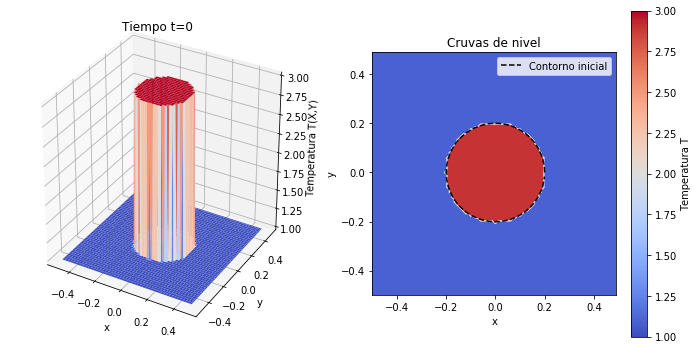

In [ ]:
#Figura para graficar
fig = plt.figure(figsize=(12, 6));
ax1 = plt.subplot(1,2,1,projection='3d') #Grafica de superficie (T,X,Y,T)
ax2 = plt.subplot(1,2,2) #Curvas de nivel 

#Grafica de la superficie
S = ax1.plot_surface(X, Y, T0,cmap='coolwarm', linewidth=0,vmin=1, vmax=3)

#Grafica de las curvas de nivel
ax2.contourf(X,Y,T0,10,cmap='coolwarm',vmin=1, vmax=3)

#Barra de color 
cb= fig.colorbar(S, orientation='vertical')
cb.set_label('Temperatura T')

#Circulo delimitador
ang = np.arange(0,2*np.pi,0.1)
ax2.plot(radio*np.cos(ang),radio*np.sin(ang),'--k',label='Contorno inicial')

#Propiedades de las graficas
G =[ax1,ax2]

for L in G:
    L.set_xlabel('x')
    L.set_ylabel('y')

ax2.set_aspect('equal') 
ax1.set_zlabel('Temperatura T(X,Y)')
ax1.set_title(f'Tiempo t=0 ')
ax2.set_title('Cruvas de nivel')
ax2.legend()

In [ ]:
#Función para obtener la temperatura en toda la malla en el tiempo siguiente
def Tn(T,C):
    Tn =np.copy(T) 
    for i in range(1,len(T[:,0])-1):
        for j in range(1,len(T[:,1])-1):
            Tn[i,j] = T[i,j] + C*(T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1]-4*T[i,j])
    return Tn

In [ ]:
#Número de pasaen el tiempo
NI = 3000
#Arreglo que guarda todos los valores obtenidos de la malla para cada paso del tiempo
TT = [T0]
#Se itera y se guardan los valores
for i in range(1,NI):
    TT.append(Tn(TT[i-1],C))

In [ ]:
#Función utilizada para la animación. Se itera sobre cada paso en el tiempo
def Temperature(i):
    ax1.clear()
    ax2.clear()
    
    #graficas
    S = ax1.plot_surface(X, Y, TT[i],cmap='coolwarm', linewidth=0,vmin=1, vmax=Ti)
    ax2.contourf(X,Y,TT[i],10,cmap='coolwarm',vmin=1, vmax=Ti)

    #Circulo delimitador de las condiciones iniciales
    ang = np.arange(0,2*np.pi,0.1)
    ax2.plot(radio*np.cos(ang),radio*np.sin(ang),'--k',label='Contorno inicial')
    
    #Propiedades de las graficas
    G =[ax1,ax2]

    for L in G:
        L.set_xlabel('x')
        L.set_ylabel('y')
    
    ax2.legend()
    ax2.set_aspect('equal') 
    ax1.set_zlabel('Temperatura z')
    ax1.set_title(f'Tiempo t={round(i*m,3)}')
    ax2.set_title('Cruvas de nivel')
    ax1.set_zlim((0,Ti))

In [ ]:
anipotencial  = ani.FuncAnimation(fig,Temperature, range(0,2000,30)) 

In [ ]:
HTML(anipotencial.to_jshtml())

NameError: ignored